<FONT COLOR="RED" SIZE="6">Hybrid Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">2_ReliefF_Algorithm</FONT>

In [1]:
#pip install skrebate

<b>The ReliefF algorithm is a feature selection technique that works by evaluating the relevance of features based on how well they differentiate between instances that are near each other. It is particularly effective for datasets with noisy, incomplete, or redundant data.

<b><font color="yellow">Key Features of Relief:</font>

<font color="violet">Feature Relevance:</font>
        Measures how well each feature separates similar instances of the same class (nearest neighbors).

<font color="violet">Handles Multiclass Data:</font>
        Unlike the original Relief algorithm, ReliefF supports multiclass classification.

<font color="violet">Works with Continuous and Categorical Features:</font>
        ReliefF can handle a mix of data types.

<font color="violet">Handles Missing Values:</font>
        Skips missing feature values during computation.

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skrebate import ReliefF
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Apply ReliefF
relief = ReliefF(n_neighbors=10)  # You can adjust the number of neighbors
relief.fit(X_train, y_train)

ReliefF(n_neighbors=10)

In [5]:
# Get feature scores
feature_scores = relief.feature_importances_

# Create a DataFrame for visualization
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)


In [6]:
print("Feature Rankings by ReliefF:")
print(feature_ranking)

Feature Rankings by ReliefF:
                         Feature     Score
11  od280/od315_of_diluted_wines  0.212815
6                     flavanoids  0.186187
12                       proline  0.158468
9                color_intensity  0.147666
5                  total_phenols  0.118932
0                        alcohol  0.107807
10                           hue  0.105881
1                     malic_acid  0.081657
8                proanthocyanins  0.080999
7           nonflavanoid_phenols  0.067103
3              alcalinity_of_ash  0.056487
4                      magnesium  0.043570
2                            ash  0.028590


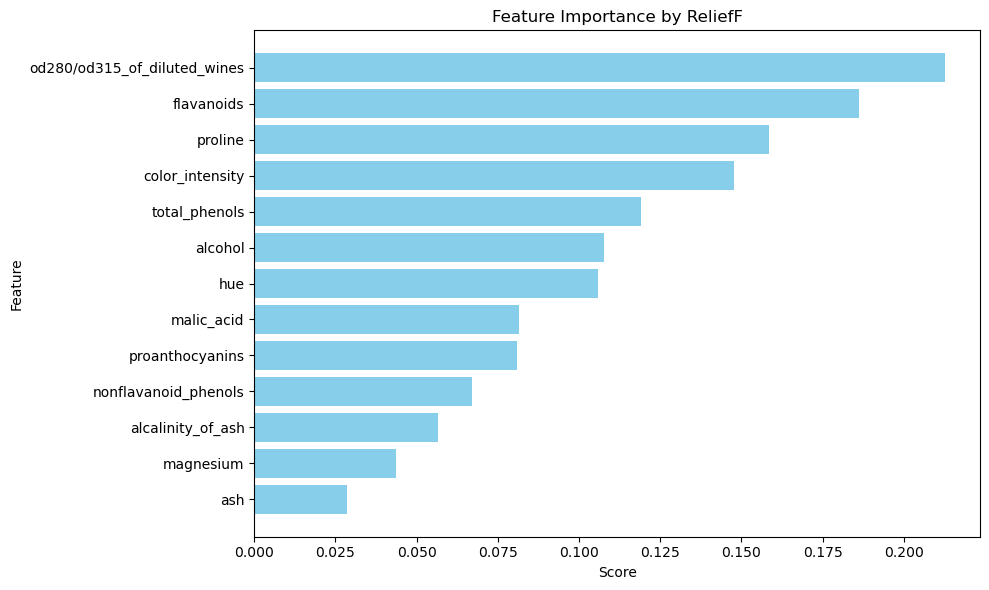

In [7]:
# Plot feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance by ReliefF')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [8]:
# Select top-k features (e.g., top 5 features)
top_k = 5
selected_features = feature_ranking['Feature'][:top_k].values
print(f"Top-{top_k} Selected Features by ReliefF: {selected_features}")

Top-5 Selected Features by ReliefF: ['od280/od315_of_diluted_wines' 'flavanoids' 'proline' 'color_intensity'
 'total_phenols']


<font color="violet" size=3>Notes:</font>

<font color="orange">Parameters:</font>
        <li>n_neighbors: Number of neighbors to consider. Increasing this can improve the algorithm's robustness but increases computation time.</li>
        <li>discrete_threshold: Determines how ReliefF treats features as categorical or continuous.</li>

<font color="orange">Limitations:</font>
        <li>Computationally expensive for large datasets with many features.</li>
        <li>Sensitive to class imbalance in the dataset.</li>